In [1]:
import numpy as np
import matplotlib.pyplot as plt
import meep as mp

In [2]:
sx = 1                        # size of cell in X direction
sy = 16                       # size of cell in Y direction
cell = mp.Vector3(sx,sy,0)    # cell size
resolution = 30               # resolution

wvl_min = 1/1.5               # minimum wavelength
wvl_max = 1/0.01              # maximum wavelength
fmin = 1/wvl_max            # minimum frequency
fmax = 1/wvl_min            # maximum frequency
fcen = (1/2)*(fmin+fmax)    # center frequency
df = (fmax-fmin)            # frequency width
nfreq = 300                 # number of frequencies at which to compute flux

k = mp.Vector3(y=fmin)    # k vector

dpml = (1/2)*(1/fcen)     # pml width

In [3]:
def pw_amp(k, y0):
    def _pw_amp(y):
        return np.exp(1j * 2*np.pi * k.dot(y + y0))
    return _pw_amp

# Without Periodic Structures

In [4]:
geometry = []

src_pt = mp.Vector3(0,-(sy/2-2*dpml),0)    # 把source的位置設在負邊界向內的2倍dpml
sources = [mp.Source(mp.GaussianSource(frequency=fcen, fwidth=df, is_integrated=False),
                     component=mp.Ex,
                     center=src_pt,
                     size=mp.Vector3(sx,0,0),
                     amp_func=pw_amp(k,src_pt))]

pml_layers = [mp.PML(thickness=dpml, direction=mp.Y, side=mp.ALL)]

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution,
                    k_point=k)

In [6]:
refl_pt = mp.Vector3(0,-(sy/2-4*dpml),0)    # 把source的位置設在負邊界向內的4倍dpml
tran_pt = mp.Vector3(0,(sy/2-4*dpml),0)     # 把source的位置設在正邊界向內的4倍dpml

refl_fr = mp.FluxRegion(center=refl_pt, size=mp.Vector3(sx,0,0))
refl = sim.add_flux(fcen, df, nfreq, refl_fr)
tran_fr = mp.FluxRegion(center=tran_pt, size=mp.Vector3(sx,0,0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

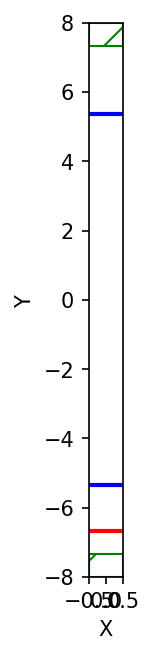

In [7]:
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca())

plt.show()

In [8]:
sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, src_pt, 1e-5))

-----------
Initializing structure...
time for choose_chunkdivision = 0.000117064 s
Working in 2D dimensions.
Computational cell is 1 x 16 x 0 with resolution 30
time for set_epsilon = 0.012264 s
-----------
Meep: using complex fields.
field decay(t = 50.016666666666666): 0.2499284976801448 / 0.2499284976801448 = 1.0
field decay(t = 100.01666666666667): 1.0118252032837166e-14 / 0.2499284976801448 = 4.048458709893248e-14
run 0 finished at t = 100.01666666666667 (6001 timesteps)


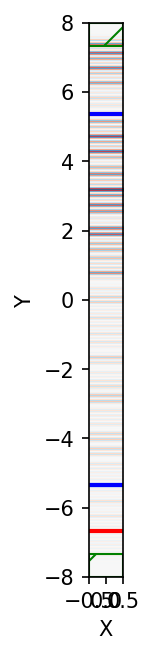

In [9]:
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca(), fields=mp.Ex)

plt.show()

In [10]:
# for normalization run, save flux fields data for reflection plane
empty_flux = mp.get_fluxes(refl) 
empty_flux_data = sim.get_flux_data(refl)

In [11]:
sim.reset_meep()

# With Periodic Structures

In [12]:
geometry = []
geometry_y = (sy/2)-6*dpml
radius = 0.5
geometry.append(mp.Cylinder(center=mp.Vector3(0,geometry_y,0),    # middle geometry
                            radius=radius,
                            axis=mp.Vector3(0,0,1),
                            height=0,
                            material=mp.Medium(epsilon=13)))
# geometry.append(mp.Cylinder(center=mp.Vector3(-(sx/2)/2,geometry_y,0),    # left 1 geometry
#                             radius=radius,
#                             axis=mp.Vector3(0,0,1),
#                             height=0,
#                             material=mp.Medium(epsilon=12)))
# geometry.append(mp.Cylinder(center=mp.Vector3(-sx/2,geometry_y,0),    # left 2 geometry
#                             radius=radius,
#                             axis=mp.Vector3(0,0,1),
#                             height=0,
#                             material=mp.Medium(epsilon=12)))
# geometry.append(mp.Cylinder(center=mp.Vector3((sx/2)/2,geometry_y,0),    # right 1 geometry
#                             radius=radius,
#                             axis=mp.Vector3(0,0,1),
#                             height=0,
#                             material=mp.Medium(epsilon=12)))
# geometry.append(mp.Cylinder(center=mp.Vector3(sx/2,geometry_y,0),    # right 2 geometry
#                             radius=radius,
#                             axis=mp.Vector3(0,0,1),
#                             height=0,
#                             material=mp.Medium(epsilon=12)))

src_pt = mp.Vector3(0,-(sy/2-2*dpml),0)    # 把source的位置設在負邊界向內的2倍dpml
sources = [mp.Source(mp.GaussianSource(frequency=fcen, fwidth=df, is_integrated=False),
                     component=mp.Ex,
                     center=src_pt,
                     size=mp.Vector3(sx,0,0),
                     amp_func=pw_amp(k,src_pt))]

pml_layers = [mp.PML(thickness=dpml, direction=mp.Y, side=mp.ALL)]

In [13]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution,
                    k_point=k)

In [14]:
refl = sim.add_flux(fcen, df, nfreq, refl_fr)
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

     cylinder, center = (0,4.02649,0)
          radius 0.5, height 0, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (13,13,13)


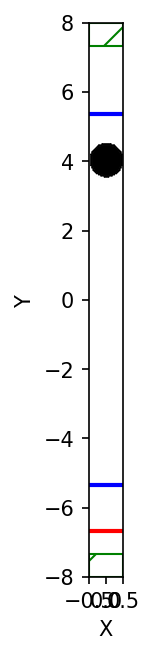

In [15]:
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca())

plt.show()

In [16]:
sim.load_minus_flux_data(refl, empty_flux_data)

-----------
Initializing structure...
time for choose_chunkdivision = 6.79493e-05 s
Working in 2D dimensions.
Computational cell is 1 x 16 x 0 with resolution 30
     cylinder, center = (0,4.02649,0)
          radius 0.5, height 0, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (13,13,13)
time for set_epsilon = 0.014956 s
-----------
Meep: using complex fields.


In [17]:
sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, src_pt, 1e-5))

field decay(t = 50.016666666666666): 0.2499284976801448 / 0.2499284976801448 = 1.0
field decay(t = 100.01666666666667): 0.0030567209033843714 / 0.2499284976801448 = 0.012230381616170568
field decay(t = 150.03333333333333): 6.50892417642596e-05 / 0.2499284976801448 = 0.000260431452869212
field decay(t = 200.05): 3.611684982604062e-05 / 0.2499284976801448 = 0.00014450873014194038
field decay(t = 250.06666666666666): 2.6499840783641184e-05 / 0.2499284976801448 = 0.00010602968860940112
field decay(t = 300.06666666666666): 1.2085711277037421e-05 / 0.2499284976801448 = 4.8356675566083525e-05
field decay(t = 350.0833333333333): 8.118221672909325e-06 / 0.2499284976801448 = 3.2482176895645245e-05
field decay(t = 400.1): 5.418323090784092e-06 / 0.2499284976801448 = 2.1679492899278698e-05
on time step 26071 (time=434.517), 0.000153429 s/step
field decay(t = 450.1166666666667): 3.0910077525050496e-06 / 0.2499284976801448 = 1.236756824930337e-05
field decay(t = 500.1333333333333): 3.171139355664454

     cylinder, center = (0,4.02649,0)
          radius 0.5, height 0, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (13,13,13)


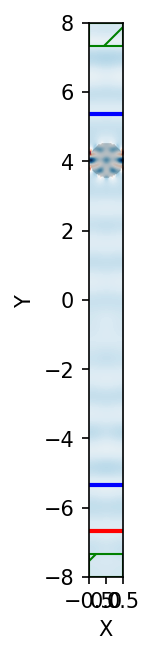

In [18]:
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca(), fields=mp.Ex)

plt.show()

In [19]:
refl_flux = mp.get_fluxes(refl)
tran_flux = mp.get_fluxes(tran)

# Reflectance & Transmittance

In [20]:
flux_freqs = mp.get_flux_freqs(refl)

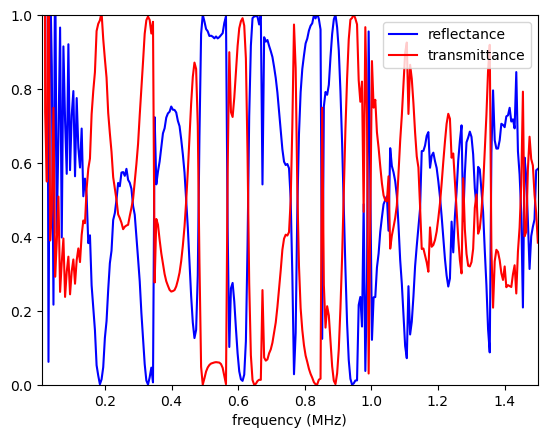

In [21]:
fq = []
Rs = []
Ts = []

for i in range(nfreq):
    fq = np.append(fq, flux_freqs[i])
    Rs = np.append(Rs, -refl_flux[i]/empty_flux[i])
    Ts = np.append(Ts, tran_flux[i]/empty_flux[i])

if mp.am_master():
    plt.figure()
    plt.plot(fq,Rs,'b-',label='reflectance')
    plt.plot(fq,Ts,'r-',label='transmittance')
    plt.axis([fmin, fmax, 0, 1])
    plt.xlabel("frequency (MHz)")
    plt.legend(loc="upper right")
    plt.show()

# Field

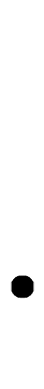

In [22]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

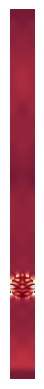

In [23]:
ex_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ex)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(np.abs(ex_data.transpose()), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()